<font color="blue">To use this notebook on Google Colaboratory, you will need to make a copy of it. Go to **File** > **Save a Copy in Drive**. You can then use the new copy that will appear in the new tab.</font>

# Clustering Analysis with Python

### Prerequisites

In [3]:
# Let's first import the libraries that we will need
# ----
#
import pandas as pd               # pandas for performing data manipulation
import numpy as np                # numpy for performing scientific computations
import matplotlib.pyplot as plt   # matplotlib for performing visualisation 

### Examples 

In [4]:
# Example
# ---
# In this example we will use the K-means algorithm to create three
# clusters from our given dataset. 
# ---
# This algorithm will partion our data into k clusters such that data points 
# in the same cluster are similar, and data points in the different 
# clusters are away from each other. The value of k would be the 
# no. of clusters we would intend to have. 
# ---
# Dataset url = https://bit.ly/RioTemperature
# ---
# 

# Let's first import our clustering algorithms 
# ---
# 
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering

#### Data Importation

In [5]:
# Then import our dataset
# ---
# Dataset url = https://bit.ly/RioTemperature

# This dataset contains rio temperature accross the years 1997 - 2019.
# We also note that we don't have a label.
# ---
# 

from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering

rio_temp_df = pd.read_csv('https://bit.ly/RioTemperature')
rio_temp_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42


In [6]:
# Checking our last records
# ---
# 
rio_temp_df.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
42,2015,29.93,28.43,26.78,25.93,23.18,21.98,22.93,23.53,23.28,25.33,26.43,999.90,28.91,25.30,22.81,25.01,25.51
43,2016,27.08,28.98,27.43,27.93,22.93,20.53,21.53,23.23,23.03,24.48,24.78,27.22,27.63,26.10,21.76,24.10,24.90
44,2017,28.92,28.27,26.97,25.52,22.57,21.97,20.02,22.42,24.22,25.97,25.47,27.01,28.14,25.02,21.47,25.22,24.96
45,2018,28.06,27.21,27.81,26.26,23.81,22.91,22.96,21.91,23.71,24.56,25.61,27.55,27.43,25.96,22.59,24.63,25.15
46,2019,30.25,28.05,27.50,26.55,24.85,23.10,21.75,22.30,23.05,25.25,999.90,999.90,28.62,26.30,22.38,24.74,25.51


#### Data Exploration / Cleaning / Preparation / Statistical Analysis

We won't perform extensive exploration / cleaning / preparation / statistical analsysis steps here because our main focus for this part of the session is to apply clustering analysis to our dataset.

#### Data Modeling / Implementing the Solution

In [7]:
# During this step we select the data that we would like to work with.
# The following code will select all the values and store them in an array containing 
# a matrix that will contain our features. 
# This matrix will then be passed to our algorithm for clustering.
# ---
# 
X = rio_temp_df.iloc[:,].values

# Let's preview our resulting data. 
# We can make comparisons with the previewed data in the previous cell just to 
# confirm we put the right values in our matrix.
# ---
# 
X

array([[1973.  ,   27.73,   27.97,   25.7 ,   26.49,   22.42,   22.76,
          22.14,   21.03,   21.46,   22.46,   23.06,   25.85,   27.45,
          24.87,   21.98,   22.33,   24.16],
       [1974.  ,   26.68,   27.16,   26.56,   23.94,   22.76,   20.7 ,
          21.2 ,   21.81,   22.91,   22.8 ,   24.51,   24.54,   26.56,
          24.42,   21.24,   23.41,   23.91],
       [1975.  ,   25.27,   26.92,   26.43,   22.82,   21.37,   20.5 ,
          19.68,   22.98,   22.4 ,   22.65,   24.11,   26.53,   25.58,
          23.54,   21.05,   23.05,   23.31],
       [1976.  ,   27.48,   26.2 ,   25.55,   24.99,   22.01,   21.18,
          20.14,   21.15,   21.27,   22.06,   24.4 ,   25.56,   26.74,
          24.18,   20.82,   22.58,   23.58],
       [1977.  ,   27.13,   28.51,   26.88,   24.22,   22.35,   22.13,
          23.07,   22.29,   22.44,   23.92,   24.48,   24.84,   27.07,
          24.48,   22.5 ,   23.61,   24.42],
       [1978.  ,   27.44,   26.55,   26.42,   23.39,   21.85,   2

In [8]:
# Scaling our values to give them all equal importance. 
# Scaling is also important as the distance between points 
# affects the way clusters are formed.
# ---
# 
# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X) 
X = norm.transform(X)

#### Method 1: K-means Clustering

In [9]:
# Lets now create the K-means clusterer that we will use to perform cluster analysis. 
# Because we want two clusters, we pass 2 to the clusterer. 
# ---
# In addition, we set random_state = 0, if we would like to reproduce results 
# at some later point in time. 
# ----
# For further info about K-means, we can refer its documentation
# by following this link: https://bit.ly/2To6GKN. This will be useful 
# to explore other model parameters that you'll get to see as an output of this cell.
# ---
# 
clusterer = KMeans(3, random_state=0)

# Then passing our data the clusterer
# ---
# 
clusterer.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [10]:
clusterer.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [11]:
# We then use the predict method to return the cluster that each data point 
# belongs to and then store this in a new column of our dataframe.
# ---
# 
rio_temp_df['kmeans_cluster_group'] = clusterer.predict(X)

In [12]:
# We then sample our dataset to check for the assigned clustering groups 0, 1 and 2. 
# We check the last column with the name "cluster_group".
# If we don't get to see these clusters, we can run the code again to get another set of records.
# ---
#
rio_temp_df.sample(20)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN,kmeans_cluster_group
23,1996,28.48,28.17,26.76,25.09,22.01,21.16,19.65,20.59,21.44,23.50,23.96,26.51,27.53,24.62,20.47,22.97,23.90,0
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01,26.22,25.29,21.74,22.78,24.01,0
17,1990,28.63,27.47,27.50,27.05,22.19,21.50,20.25,19.95,21.17,24.21,26.19,26.08,27.32,25.58,20.57,23.86,24.33,0
10,1983,26.81,27.63,25.99,24.08,23.82,21.18,21.55,20.91,20.53,23.03,25.25,25.94,26.47,24.63,21.21,22.94,23.81,0
16,1989,26.98,26.59,26.45,25.43,21.92,20.90,19.47,21.67,21.70,22.07,24.85,25.86,26.44,24.60,20.68,22.87,23.65,0
14,1987,27.68,27.25,25.86,25.85,22.73,20.48,22.43,20.80,21.02,22.96,24.59,26.07,27.03,24.81,21.24,22.86,23.99,0
22,1995,28.64,27.59,26.75,24.97,23.17,21.84,23.06,23.90,23.05,23.21,25.13,25.93,27.85,24.96,22.93,23.80,24.89,0
20,1993,27.48,27.25,26.81,25.68,22.85,20.98,999.90,999.90,999.90,999.90,999.90,999.90,26.70,25.11,999.90,999.90,999.90,1
38,2011,28.14,28.69,25.50,25.48,21.86,20.52,20.61,22.32,21.79,23.71,23.24,25.47,27.92,24.28,21.15,22.91,24.07,0
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42,0


In [13]:
rio_temp_df.groupby(['kmeans_cluster_group']).mean()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
kmeans_cluster_group,,,,,,,,,,,,,,,,,,
0,1996.000000,27.3635,51.8935,26.572500,25.082500,22.7835,21.581000,21.194500,21.9525,22.379000,23.748500,49.160750,74.91225,27.09275,24.813000,21.575750,23.647,24.283000
1,1997.000000,269.9625,756.7375,756.627500,756.345000,755.6375,755.170000,999.900000,999.9000,999.900000,756.152500,756.192500,756.66750,269.80250,756.202500,999.900000,756.015,999.900000
2,1994.666667,999.9000,675.9100,26.373333,25.453333,348.7700,21.786667,21.126667,21.5800,22.646667,23.596667,25.486667,26.38000,999.90000,25.036667,21.496667,23.910,24.406667


In [14]:
# To preview the records in our first cluster which is cluster 0 we perform
# the following pandas operation.
# ---
# 
first_cluster = rio_temp_df[rio_temp_df.kmeans_cluster_group.isin([0])]
first_cluster.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN,kmeans_cluster_group
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16,0
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91,0
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31,0
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58,0
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42,0


In [15]:
# To preview the records in our second cluster which is cluster 1, we can do the following;
# ---
# 
second_cluster = rio_temp_df[rio_temp_df.kmeans_cluster_group.isin([1])]
second_cluster.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN,kmeans_cluster_group
12,1985,25.53,999.90,999.90,999.90,999.90,999.90,999.9,999.9,999.9,999.90,999.90,999.90,25.65,999.90,999.9,999.90,999.9,1
20,1993,27.48,27.25,26.81,25.68,22.85,20.98,999.9,999.9,999.9,999.90,999.90,999.90,26.70,25.11,999.9,999.90,999.9,1
30,2003,26.94,999.90,999.90,999.90,999.90,999.90,999.9,999.9,999.9,999.90,999.90,999.90,26.96,999.90,999.9,999.90,999.9,1
34,2007,999.90,999.90,999.90,999.90,999.90,999.90,999.9,999.9,999.9,24.91,25.07,26.97,999.90,999.90,999.9,24.36,999.9,1


In [16]:
# We can preview the records in our third cluster which is cluster 2 as shown below:
# ---
# NB: If you investigate this cluster, and compare it with the other clusters.
# One might resolve this is a cluster of outliers owing to the large values found in our features.
# ---
#
third_cluster = rio_temp_df[rio_temp_df.kmeans_cluster_group.isin([2])]
third_cluster.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN,kmeans_cluster_group
13,1986,999.9,27.93,26.95,25.97,999.90,22.70,21.09,22.66,21.46,23.04,25.76,26.17,999.9,25.45,22.15,23.42,24.60,2
21,1994,999.9,999.90,26.56,24.97,23.95,21.16,21.59,20.85,22.72,24.56,25.63,27.32,999.9,25.16,21.20,24.30,24.48,2
31,2004,999.9,999.90,25.61,25.42,22.46,21.50,20.70,21.23,23.76,23.19,25.07,25.65,999.9,24.50,21.14,24.01,24.14,2


If we had a dataset with 2 features i.e. x and y, then it would be easy to visualise our clusters. However, there are techniques such as Principal Component Analysis (PCA), which we can use for visualising a dataset with many features. This topic beyond the scope of this session.

##### Challenging our Solution

##### **Elbow Method**

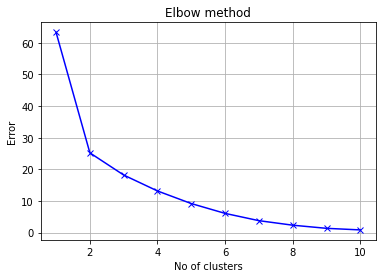

In [17]:
# Elbow Method
# ---
# We can also check the optimal values of K through the use of the 
# elbow method as shown below.
# We will run the KNN algorithm for different values of K (say K = 10 to 1) 
# and plot the K values against SSE(Sum of Squared Errors). 
# And select the value of K for the elbow point as shown in the figure.
# ---
# 

# We will first define an empy list where we will be required to store our errors
# ---
#
Error = []

# Then use a for loop to run KNN several times and append values the sum of squared errors 
# the error list created above. The values in this list willl then be plotted agains the no. of clusters.
# to create our elbow method visualisation.
# ---
#
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

# We plot our elbow method visualisation: No. of clusters vs Error
# ---
# 
plt.plot(range(1, 11), Error, 'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid(True);

The output graph of the Elbow method is shown above. 
As we can see, the optimal value of k is 2, as the elbow-like shape is formed at k=2 in the above graph. We can implement k-means again using k = 2.



##### **Silhouette Analysis**

As per the scikit learn docs, silhouette analysis can be used to study the separation distance between the resulting clusters (How far appart clusters are from each other as a measure of the quality of clustering achieved). The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. Silhouette coefficients have values ranging from -1 to 1. The closer the value is to 1 the better the clustering achieved. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [18]:
# Silhouette Analysis
# ---
# 
from sklearn.metrics import silhouette_score
silhouette = [] # list of separation distance between the resulting clusters for each value of k 

K = range(2, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X) 
    silhouette.append(silhouette_score(X, kmeans.labels_))

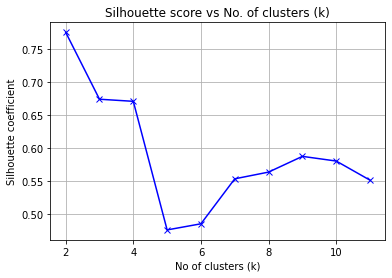

In [19]:
# We plot our Silhouette Plot
# ---
# 
plt.plot(range(2, 12), silhouette, 'bx-')
plt.title('Silhouette score vs No. of clusters (k)')
plt.xlabel('No of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid(True);

The silhouette plot shows the that the silhouette coefficient was highest when k = 2, suggesting that's the optimal number of clusters. Two clusters best captures the segmentation of this data set.

#### Method 2: Agglomerative Clustering

Hierarchichal clustering exists in two variants, agglomerative(bottom-up) or divisive(top-down). Agglomerative begins with each feature being its own cluster and then proceeds to group features based on the similarity measure provided following a bottom-up approach. This builds a tree-like structure that depicts all possible groupings in the provided dataset. Divisive Clustering is the exact opposite of agglomerative where instead of beginning with each feature as its own cluster, the algorithm first considers all the features as one and then proceeds to break this one cluster down into its possible constituent clusters.

Dendrograms prove useful in hierarcical clustering as the allow one to visually depict the resultant nodes after each stage of clustering as the algorithm builds the 'tree of clusters'

In [21]:
# Lets now create thegglomerative clusterer that we will use to perform cluster analysis.
# ---
#
agglo_clusterer = AgglomerativeClustering().fit(X) 

In [22]:
# We can preview our created labels as shown
# ---
#
labels = agglo_clusterer.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [23]:
# We then store our labels to a new column belongs to and then store this in a new column of our dataframe.
# --- 
rio_temp_df['agg_cluster_group'] = labels

In [ ]:
# Lets sample our dataframe and check our agg_cluster_group column
# ---
#
rio_temp_df.sample(20)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN,kmeans_cluster_group,agg_cluster_group
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16,0,0
29,2002,27.04,26.29,27.72,26.34,23.38,23.08,21.27,23.49,21.78,25.67,25.67,26.45,26.38,25.81,22.61,24.37,24.80,0,0
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02,25.07,23.74,21.00,23.46,23.32,0,0
32,2005,26.75,26.12,26.64,26.09,23.85,22.41,20.91,23.41,22.18,25.45,24.60,25.26,26.17,25.53,22.24,24.08,24.51,0,0
38,2011,28.14,28.69,25.50,25.48,21.86,20.52,20.61,22.32,21.79,23.71,23.24,25.47,27.92,24.28,21.15,22.91,24.07,0,0
16,1989,26.98,26.59,26.45,25.43,21.92,20.90,19.47,21.67,21.70,22.07,24.85,25.86,26.44,24.60,20.68,22.87,23.65,0,0
42,2015,29.93,28.43,26.78,25.93,23.18,21.98,22.93,23.53,23.28,25.33,26.43,999.90,28.91,25.30,22.81,25.01,25.51,0,0
25,1998,28.57,28.32,27.72,26.03,22.89,20.59,21.30,23.21,23.48,23.23,23.54,26.86,28.22,25.55,21.70,23.42,24.72,0,0
15,1988,28.82,26.03,26.49,24.65,22.70,19.74,19.24,21.36,21.89,22.19,23.57,25.75,26.97,24.61,20.11,22.55,23.56,0,0
44,2017,28.92,28.27,26.97,25.52,22.57,21.97,20.02,22.42,24.22,25.97,25.47,27.01,28.14,25.02,21.47,25.22,24.96,0,0


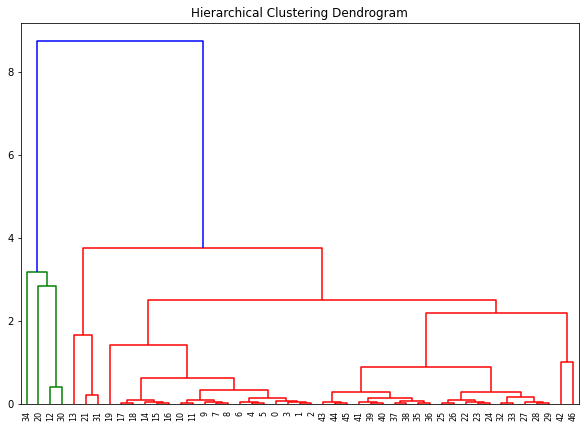

In [ ]:
# Lets now create a dendrogram
# ---
# We will use the scipy library to perform this task 
# however we can also use sckit learn: https://bit.ly/2WK95B8
# ---
# We import the hierarchy class of the scipy.cluster library as shc. 
# The hierarchy class has a dendrogram method which takes the value returned 
# by the linkage method of the same class. 
# The linkage method takes the dataset and the method to minimize distances as parameters. 
# We use 'ward' as the method since it minimizes then variants of distances between the clusters.
# ---
#
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

If we were to draw a horizontal line that passes through longest distance without a horizontal line, our line would cut the blue line twice. This means that 2 is the optimal no. of clusters.

### <font color="green">Challenges</font> 

In [25]:
# Challenge 1
# ---
# Perform cluster analysis on the following loan applicants dataset by creating 
# 4 clusters of customers. In addition, challenge your solution by determining 
# the optimal no. of customers by performing the elbow method.
# Hint: Check and deal with missing values.
# ---
# Dataset url = https://bit.ly/LoanApplicantsDs
# ---
# OUR CODE GOES BELOW
# 
 
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering

fts_df = pd.read_csv('https://bit.ly/LoanApplicantsDs')
fts_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,LP001003,0.0,1,1,1,0.0,4583,1508.0,128,360.0,1.0,0
1,LP001005,0.0,1,0,1,1.0,3000,0.0,66,360.0,1.0,1
2,LP001006,0.0,1,0,0,0.0,2583,2358.0,120,360.0,1.0,1
3,LP001008,0.0,0,0,1,0.0,6000,0.0,141,360.0,1.0,1
4,LP001013,0.0,1,0,0,0.0,2333,1516.0,95,360.0,1.0,1


In [48]:
fts_df.dropna()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,LP001003,0.0,1,1,1,0.0,4583,1508.0,128,360.0,1.0,0
1,LP001005,0.0,1,0,1,1.0,3000,0.0,66,360.0,1.0,1
2,LP001006,0.0,1,0,0,0.0,2583,2358.0,120,360.0,1.0,1
3,LP001008,0.0,0,0,1,0.0,6000,0.0,141,360.0,1.0,1
4,LP001013,0.0,1,0,0,0.0,2333,1516.0,95,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,0.0,1,3+,1,0.0,5703,0.0,128,360.0,1.0,1
377,LP002974,0.0,1,0,1,0.0,3232,1950.0,108,360.0,1.0,0
378,LP002978,1.0,0,0,1,0.0,2900,0.0,71,360.0,1.0,0
379,LP002979,0.0,1,3+,1,0.0,4106,0.0,40,180.0,1.0,0


In [46]:
X = fts_df.iloc[:,].values

X

array([['LP001003', 0.0, 1, ..., 360.0, 1.0, 0],
       ['LP001005', 0.0, 1, ..., 360.0, 1.0, 1],
       ['LP001006', 0.0, 1, ..., 360.0, 1.0, 1],
       ...,
       ['LP002978', 1.0, 0, ..., 360.0, 1.0, 0],
       ['LP002979', 0.0, 1, ..., 180.0, 1.0, 0],
       ['LP002990', 1.0, 0, ..., 360.0, 0.0, 2]], dtype=object)

In [49]:
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X) 
X = norm.transform(X)

ValueError: ignored

In [ ]:
# Challenge 2
# ---  
# An computer distributor has the given data on the computers in stock.
# Perform clustering analysis on the following computers dataset to identify
# the optimal no. clusters.
# ---
# Dataset url = https://bit.ly/ComputersDs
# ---
# OUR CODE GOES BELOW
#  